# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [21]:
ID = 219344917
sectors = np.array([4,5,6,31,32])

period = 14.3625402111
tdepth = 0.0004653432110229511

lc_file = "TOI_871_S04_05_06_31_32.csv"
contrastcurve_file = "TOI_871_562nm.csv"

band = 'Vis'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_9792\4136908869.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap04, ap05, ap06, ap31, ap32])


Sector 4


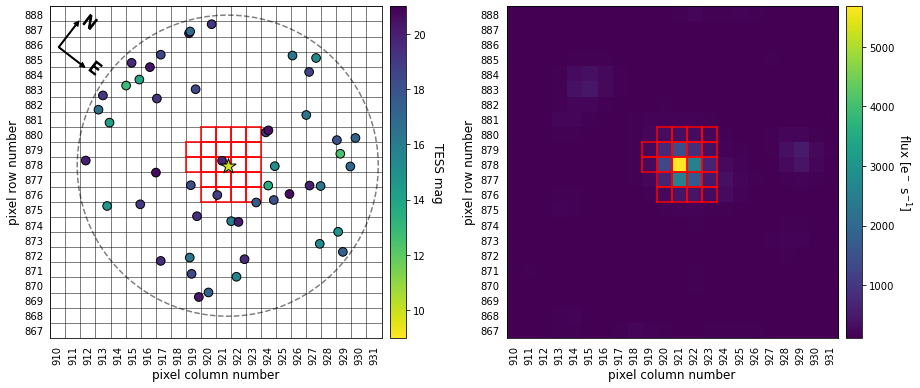

Sector 5


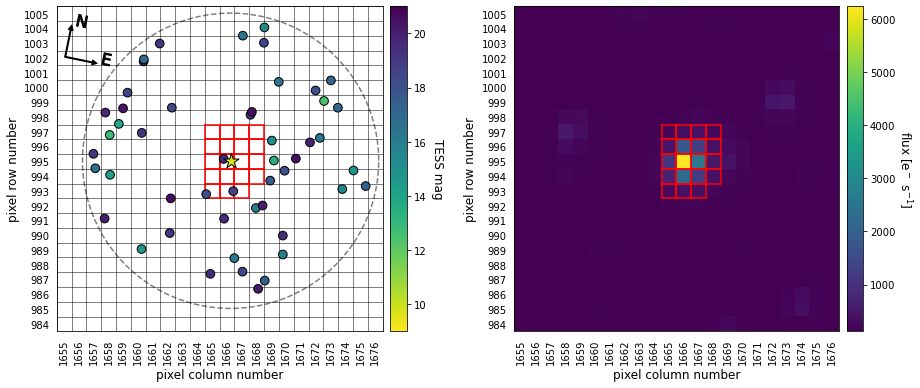

Sector 6


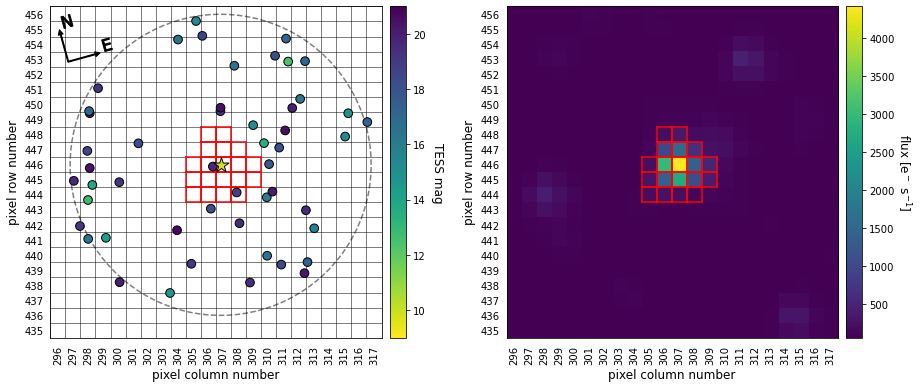

Sector 31


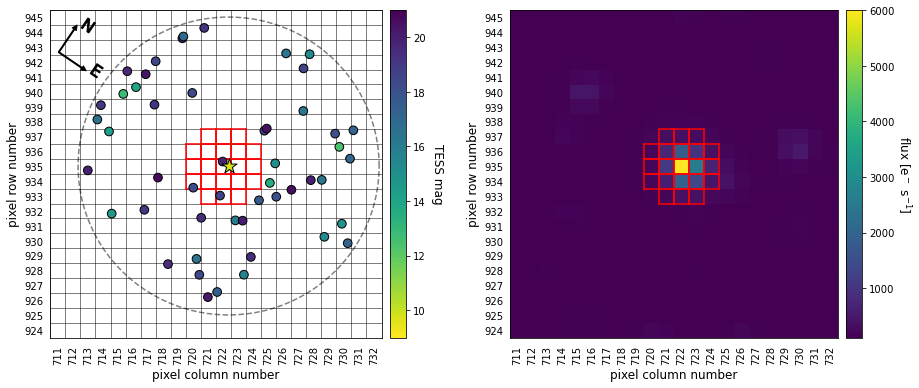

Sector 32


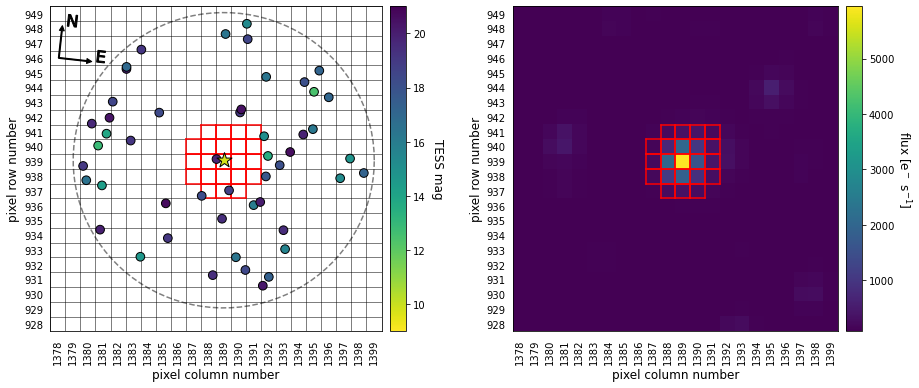

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,219344917,9.7607,8.954,8.488,8.380,74.738165,-50.626891,0.810000,0.732189,4917.0,14.666700,0.000,0.000
1,685410847,19.7504,NaN,NaN,NaN,74.733732,-50.626736,NaN,NaN,NaN,NaN,10.140,273.153
2,685410846,18.7085,NaN,NaN,NaN,74.743682,-50.638245,NaN,NaN,3840.0,1.380160,42.772,162.871
3,219344914,18.2690,16.652,15.851,15.592,74.727682,-50.641479,0.540000,0.538964,3690.0,0.678865,57.714,204.498
4,219344921,13.5352,12.914,12.576,12.511,74.764376,-50.623422,1.000000,1.173340,5651.0,1.214320,61.150,78.225
5,219344915,17.6960,16.299,15.971,15.456,74.764698,-50.631366,0.610000,0.598284,3915.0,0.736082,62.695,104.898
6,219344924,15.1221,14.429,14.071,13.972,74.760557,-50.616007,1.000000,1.192880,5634.0,0.560730,64.427,52.551
7,685410872,19.0375,NaN,NaN,NaN,74.744316,-50.607859,0.410000,0.424995,3420.0,0.656581,69.942,11.592
8,685410873,20.4850,NaN,NaN,NaN,74.744816,-50.606651,NaN,NaN,NaN,NaN,74.433,11.780
9,219344912,15.9488,14.698,14.103,13.846,74.759568,-50.642896,0.564384,0.571726,3866.0,1.861540,75.552,139.703


In [4]:
ap04 = np.array([[920,876],[921,876],[922,876],[923,876],[920,877],
                 [921,877],[922,877],[923,877],[919,878],[920,878],
                 [921,878],[922,878],[923,878],[919,879],[920,879],
                 [921,879],[922,879],[923,879],[920,880],[921,880],
                 [922,880],[923,880]])

ap05 = np.array([[1665,993],[1666,993],[1667,993],[1665,994],[1666,994],
                 [1667,994],[1668,994],[1665,995],[1666,995],[1667,995],
                 [1668,995],[1665,996],[1666,996],[1667,996],[1668,996],
                 [1665,997],[1666,997],[1667,997],[1668,997]])

ap06 = np.array([[305,444],[306,444],[307,444],[308,444],[305,445],
                 [306,445],[307,445],[308,445],[309,445],[305,446],
                 [306,446],[307,446],[308,446],[309,446],[306,447],
                 [307,447],[308,447],[306,448],[307,448]])

ap31 = np.array([[721,933],[722,933],[723,933],[720,934],[721,934],
                 [722,934],[723,934],[724,934],[720,935],[721,935],
                 [722,935],[723,935],[724,935],[720,936],[721,936],
                 [722,936],[723,936],[724,936],[721,937],[722,937],
                 [723,937]])

ap32 = np.array([[1388,937],[1389,937],[1390,937],[1387,938],[1388,938],
                 [1389,938],[1390,938],[1391,938],[1387,939],[1388,939],
                 [1389,939],[1390,939],[1391,939],[1387,940],[1388,940],
                 [1389,940],[1390,940],[1391,940],[1388,941],[1389,941],
                 [1390,941],[1391,941]])

apertures = np.array([ap04, ap05, ap06, ap31, ap32])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

# Check Nearby Region

In [5]:
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,219344917,9.7607,8.954,8.488,8.380,74.738165,-50.626891,0.810000,0.732189,4917.0,14.666700,0.000,0.000,9.922988e-01,0.000469
1,685410847,19.7504,NaN,NaN,NaN,74.733732,-50.626736,NaN,NaN,NaN,NaN,10.140,273.153,9.893385e-05,0.000000
2,685410846,18.7085,NaN,NaN,NaN,74.743682,-50.638245,NaN,NaN,3840.0,1.380160,42.772,162.871,1.873571e-04,0.000000
3,219344914,18.2690,16.652,15.851,15.592,74.727682,-50.641479,0.540000,0.538964,3690.0,0.678865,57.714,204.498,1.365318e-04,0.000000
4,219344921,13.5352,12.914,12.576,12.511,74.764376,-50.623422,1.000000,1.173340,5651.0,1.214320,61.150,78.225,5.713621e-03,0.081445
5,219344915,17.6960,16.299,15.971,15.456,74.764698,-50.631366,0.610000,0.598284,3915.0,0.736082,62.695,104.898,1.466405e-04,0.000000
6,219344924,15.1221,14.429,14.071,13.972,74.760557,-50.616007,1.000000,1.192880,5634.0,0.560730,64.427,52.551,1.150753e-03,0.404381
7,685410872,19.0375,NaN,NaN,NaN,74.744316,-50.607859,0.410000,0.424995,3420.0,0.656581,69.942,11.592,2.595381e-05,0.000000
8,685410873,20.4850,NaN,NaN,NaN,74.744816,-50.606651,NaN,NaN,NaN,NaN,74.433,11.780,4.387296e-06,0.000000
9,219344912,15.9488,14.698,14.103,13.846,74.759568,-50.642896,0.564384,0.571726,3866.0,1.861540,75.552,139.703,2.105475e-04,0.000000


In [6]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(i, target.stars['ID'][i])

4 219344921
6 219344924


In [7]:
'''target.stars['tdepth'][4] = 0
target.stars['tdepth'][6] = 0'''

"target.stars['tdepth'][4] = 0\ntarget.stars['tdepth'][6] = 0"

# Ploting CC File

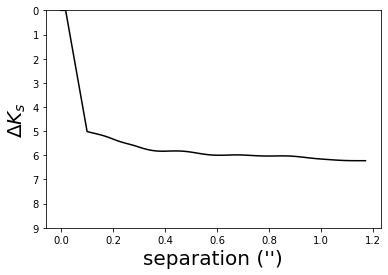

In [22]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

CPU times: total: 1.56 s
Wall time: 1.57 s


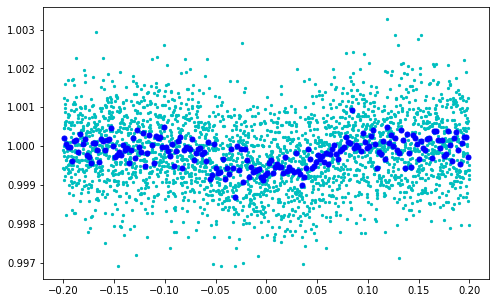

In [23]:
%%time

lc = pd.read_csv(lc_file, header=None)

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/200
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

plt.scatter(time, flux, s = 5, c = 'c')
plt.scatter(lc.time.value, lc.flux.value, s = 25,  c = 'b')
fig=plt.gcf()
fig.set_size_inches(8,5)

In [24]:
FPPs = np.zeros(5)
NFPPs = np.zeros(5)
for i in range(5):
    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889,
                      parallel=True)

    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP
    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)

Calculating TP scenario probabilitiey for 219344917.
Calculating EB and EBx2P scenario probabilities for 219344917.
Calculating PTP scenario probability for 219344917.
Calculating PEB and PEBx2P scenario probabilities for 219344917.
Calculating STP scenario probability for 219344917.
Calculating SEB and SEBx2P scenario probabilities for 219344917.
Calculating DTP scenario probability for 219344917.
Calculating DEB and DEBx2P scenario probabilities for 219344917.
Calculating BTP scenario probability for 219344917.
Calculating BEB and BEBx2P scenario probabilities for 219344917.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 219344921.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 219344924.
FPP =  0.009980294232070253
NFPP =  0.008797120201361284
Calculating TP scenario probabilitiey for 219344917.
Calculating EB and EBx2P scenario probabilities for 219344917.
Calculating PTP scenario probability for 219344917.
Calculating PEB and PEBx2P scenario probabilities

In [25]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.008151760777428851
NFPP =  0.006834639322355667


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,219344917,TP,0.810000,0.732189,14.36254,88.894714,0.690073,0.334630,219.797516,1.906374,0.000000,0.000000,9.357235e-01
1,219344917,EB,0.810000,0.732189,14.36254,86.548905,1.700443,0.296357,69.100122,0.000000,0.768565,0.732189,1.161679e-49
2,219344917,EBx2P,0.810000,0.732189,28.72508,88.615901,0.442832,0.891356,199.230961,0.000000,0.787983,0.732189,3.999421e-20
3,219344917,PTP,0.810000,0.732189,14.36254,88.944705,0.401328,0.519604,173.310799,2.087424,0.000000,0.000000,2.904401e-02
4,219344917,PEB,0.810000,0.732189,14.36254,87.066906,1.942727,0.030153,56.612146,0.000000,0.699627,0.730389,5.547469e-48
5,219344917,PEBx2P,0.810000,0.732189,28.72508,88.862893,0.889084,0.580608,186.553094,0.000000,0.794185,0.732189,9.941147e-24
6,219344917,STP,0.768434,0.732189,14.36254,88.885364,0.453567,0.402563,162.973307,2.990078,0.000000,0.000000,3.148112e-04
7,219344917,SEB,0.152893,0.184635,14.36254,89.537304,0.371897,0.737877,198.220357,0.000000,0.039690,0.100000,1.661798e-06
8,219344917,SEBx2P,0.382406,0.387151,28.72508,89.209392,0.489141,0.717112,157.449118,0.000000,0.377816,0.383274,1.193024e-07
9,219344917,DTP,0.810000,0.732189,14.36254,89.855245,0.082036,0.131660,341.404473,1.756866,0.000000,0.000000,2.708072e-02


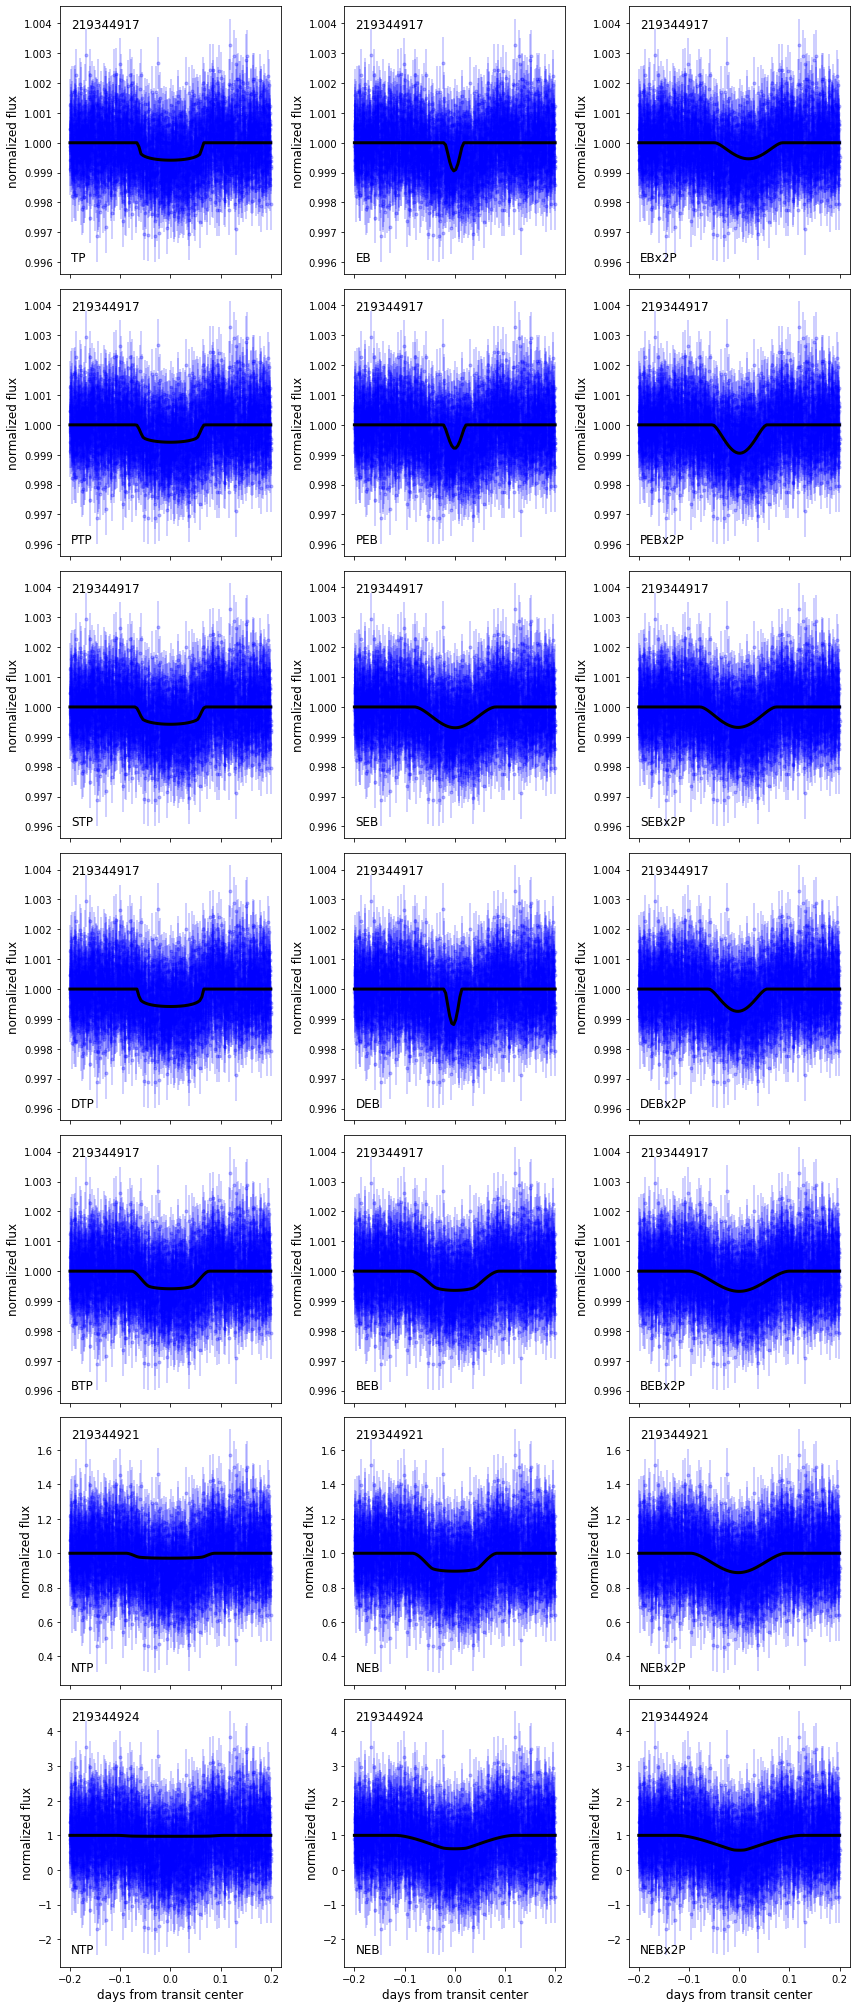

In [26]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

In [27]:
for i in range (len(FPPs)):
    print(FPPs[i],",")

print("NFPPs:")
for i in range (len(FPPs)):
    print(NFPPs[i],",")

0.009980294232070253 ,
0.010154716535954345 ,
0.010535012605476957 ,
0.009646375712336064 ,
0.008151760777428851 ,
NFPPs:
0.008797120201361284 ,
0.00845177123384335 ,
0.008867471413943593 ,
0.008289784297454316 ,
0.006834639322355667 ,


In [28]:
ID = 219344917
sectors = np.array([4,5,6,31,32])

period = 14.3625402111
tdepth = 0.0004653432110229511

lc_file = "TOI_871_S04_05_06_31_32.csv"
contrastcurve_file = "TOI_871_832nm.csv"

band = 'TESS'

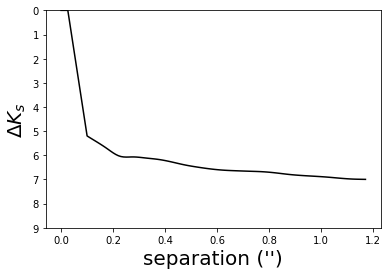

In [29]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

CPU times: total: 1.86 s
Wall time: 1.85 s


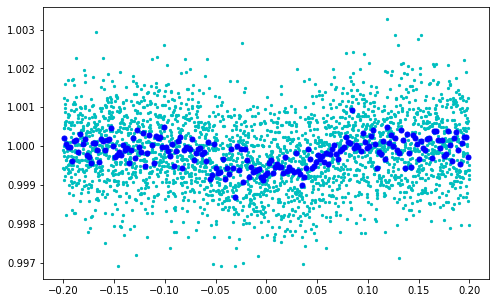

In [30]:
%%time

lc = pd.read_csv(lc_file, header=None)

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/200
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

plt.scatter(time, flux, s = 5, c = 'c')
plt.scatter(lc.time.value, lc.flux.value, s = 25,  c = 'b')
fig=plt.gcf()
fig.set_size_inches(8,5)

In [31]:
FPPs = np.zeros(5)
NFPPs = np.zeros(5)
for i in range(5):
    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889,
                      parallel=True)

    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP
    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)

Calculating TP scenario probabilitiey for 219344917.
Calculating EB and EBx2P scenario probabilities for 219344917.
Calculating PTP scenario probability for 219344917.
Calculating PEB and PEBx2P scenario probabilities for 219344917.
Calculating STP scenario probability for 219344917.
Calculating SEB and SEBx2P scenario probabilities for 219344917.
Calculating DTP scenario probability for 219344917.
Calculating DEB and DEBx2P scenario probabilities for 219344917.
Calculating BTP scenario probability for 219344917.
Calculating BEB and BEBx2P scenario probabilities for 219344917.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 219344921.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 219344924.
FPP =  0.009514047339321596
NFPP =  0.008881274717195648
Calculating TP scenario probabilitiey for 219344917.
Calculating EB and EBx2P scenario probabilities for 219344917.
Calculating PTP scenario probability for 219344917.
Calculating PEB and PEBx2P scenario probabilities

In [32]:
for i in range (len(FPPs)):
    print(FPPs[i],",")

print("NFPPs:")
for i in range (len(FPPs)):
    print(NFPPs[i],",")

0.009514047339321596 ,
0.008603870825041549 ,
0.010759409049386548 ,
0.007783039836600669 ,
0.009771103678080761 ,
NFPPs:
0.008881274717195648 ,
0.007626496148580622 ,
0.00975783137888778 ,
0.007049976901295863 ,
0.008514934291457242 ,


In [34]:
##TESS 832nmm

fpp=np.array([0.009514047339321596 ,
0.008603870825041549 ,
0.010759409049386548 ,
0.007783039836600669 ,
0.009771103678080761])
nfpp=np.array([0.008881274717195648 ,
0.007626496148580622 ,
0.00975783137888778 ,
0.007049976901295863 ,
0.008514934291457242])

print(np.mean(fpp),"+/-",np.std(fpp))
print(np.mean(nfpp),"+/-",np.std(nfpp))

0.009286294145686224 +/- 0.0010180819638673235
0.00836610268748343 +/- 0.0009490697270983753


In [33]:
##Vis 562nm

fpp=np.array([0.009980294232070253 ,
0.010154716535954345 ,
0.010535012605476957 ,
0.009646375712336064 ,
0.008151760777428851 ])
nfpp=np.array([0.008797120201361284 ,
0.00845177123384335 ,
0.008867471413943593 ,
0.008289784297454316 ,
0.006834639322355667])

print(np.mean(fpp),"+/-",np.std(fpp))
print(np.mean(nfpp),"+/-",np.std(nfpp))

0.009693631972653294 +/- 0.0008224713407263896
0.008248157293791641 +/- 0.000738394847340728
